Arshak Parsa

In [123]:
import numpy as np
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
import seaborn as sb
import matplotlib.pyplot as plt

# Task 1 (Data Preparation and Building a Base Decision Tree)

## Part A (Loading and Preprocessing)

In [84]:
df = pd.read_csv("data/dataset.csv")
df.shape

(4269, 13)

In [85]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


We should remove load_id because it does not add any information to our data.

In [87]:
df = df.drop(["loan_id"], axis=1)

There is no missing data.

In [89]:
df.columns = df.columns.to_series().apply(lambda x : x.replace(" ","")) # let's remove those annoying spaces 

In [91]:
df['loan_status'].value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

I can say it's balanced.

In [92]:
nomvar = ["education", 'self_employed']
prep = ColumnTransformer(
    transformers=[
        # (name, pipeline_object, column_list)
        #('numeric', numerical_pipeline, [e for e in df.columns if e not in nomvar]),
        ('nominal', make_pipeline(OneHotEncoder()), nomvar)
    ],
    remainder='passthrough',  # 'drop' any columns not listed, 'passthrough' would keep them
    verbose_feature_names_out=False
)

In [93]:
# DO NOT FORGET THE EXTRA [] :))))
df["loan_status"] = OrdinalEncoder(categories=[[" Rejected", " Approved"]]).fit_transform(df[["loan_status"]])

In [94]:
print("--- Setup and Data Splitting ---")

y = df['loan_status']

X = df.drop('loan_status', axis=1)

# --- Train-Test Split ---
# This is the MOST IMPORTANT step to do FIRST.
# We use 'stratify=y' to ensure the test set has the same
# proportion of survivors as the training set.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,     
    random_state=52,
    stratify=y
)

print(f"Training set shape (X): {X_train.shape}")
print(f"Testing set shape (X): {X_test.shape}")

--- Setup and Data Splitting ---
Training set shape (X): (3415, 11)
Testing set shape (X): (854, 11)


In [95]:
# let's test the prep 
pd.DataFrame(
    prep.fit_transform(X_train), 
    columns=prep.get_feature_names_out(), 
    index=X_train.index
)

,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
4056,1.0,0.0,0.0,1.0,2.0,7800000.0,22100000.0,6.0,533.0,11900000.0,2500000.0,19300000.0,10800000.0
3488,1.0,0.0,0.0,1.0,3.0,6300000.0,23300000.0,4.0,347.0,18300000.0,12200000.0,21100000.0,8100000.0
1659,0.0,1.0,1.0,0.0,1.0,500000.0,1700000.0,2.0,680.0,700000.0,800000.0,1400000.0,700000.0
2120,0.0,1.0,0.0,1.0,3.0,3200000.0,7200000.0,6.0,728.0,4800000.0,2000000.0,8000000.0,4600000.0
430,0.0,1.0,0.0,1.0,4.0,9300000.0,27500000.0,18.0,338.0,21500000.0,500000.0,34900000.0,6600000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,0.0,1.0,0.0,1.0,0.0,3800000.0,10600000.0,12.0,490.0,3300000.0,6500000.0,14400000.0,3100000.0
2583,1.0,0.0,0.0,1.0,4.0,5900000.0,17300000.0,20.0,657.0,1500000.0,5600000.0,13000000.0,4100000.0
2910,0.0,1.0,1.0,0.0,5.0,500000.0,1200000.0,16.0,499.0,600000.0,600000.0,1500000.0,200000.0
1993,0.0,1.0,0.0,1.0,4.0,9200000.0,28100000.0,12.0,760.0,23200000.0,9700000.0,22300000.0,12900000.0


## Part B (Training Decision Tree)

Train Results:
              precision    recall  f1-score   support

         0.0       0.99      0.92      0.96      1290
         1.0       0.96      1.00      0.98      2125

    accuracy                           0.97      3415
   macro avg       0.97      0.96      0.97      3415
weighted avg       0.97      0.97      0.97      3415



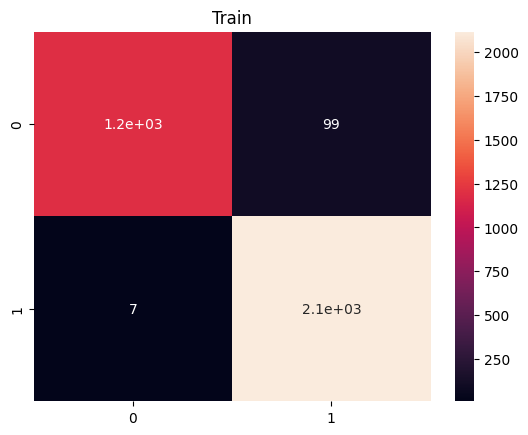

Test Results:
              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95       323
         1.0       0.96      0.98      0.97       531

    accuracy                           0.96       854
   macro avg       0.96      0.96      0.96       854
weighted avg       0.96      0.96      0.96       854



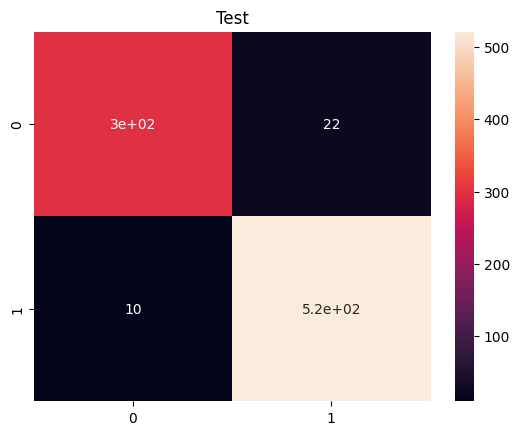

In [119]:
tree_d4 = make_pipeline(prep, DecisionTreeClassifier(max_depth=4)).fit(X_train,y_train)
def validate_model(m):
    def v(m,yt,yp,title):
        print(classification_report(yt,yp))
        sb.heatmap(confusion_matrix(yt, yp), annot=True)
        plt.title(title)
        plt.show()
    print("Train Results:")
    v(m,y_train,m.predict(X_train),"Train")
    print("Test Results:")
    v(m,y_test,m.predict(X_test),"Test")
validate_model(tree_d4)

Looks like Decision Tree performs pretty well!

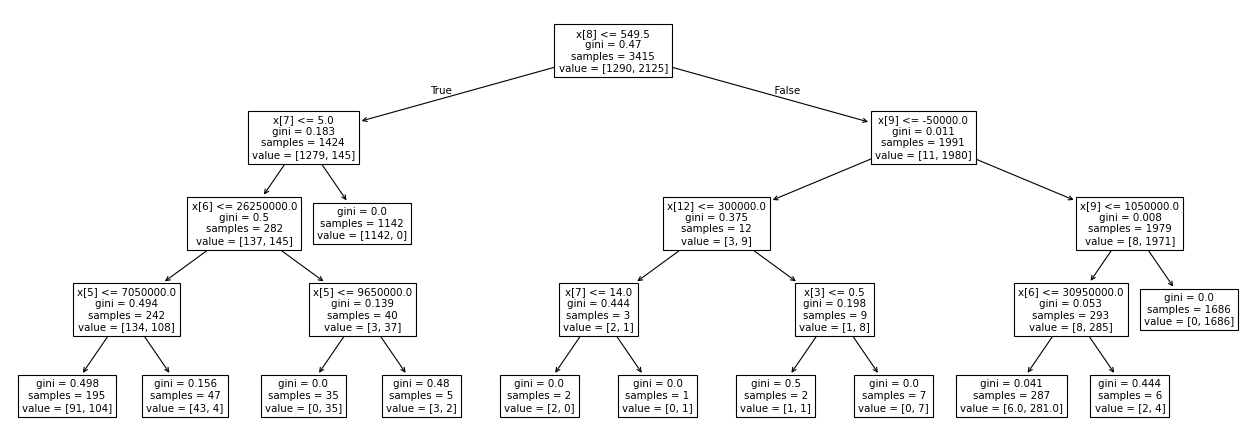

In [132]:
plt.figure(figsize=(20, 7), dpi=80)
plot_tree(tree_d4["decisiontreeclassifier"])
print()

In [145]:
m = tree_d4["decisiontreeclassifier"]
print(m.tree_.n_leaves,m.tree_.node_count,m.get_depth())

12 23 4


It's a pretty simple model in my opinion

# Task 2 (Impact of model Complexity and Tree Pruning)

## Part A (Training a Tree without Depth Limit)

## Part B (Checking Different Depths)

## Part C (Cost Complexity Pruning)

## Final Results